In [95]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels as sm
from pathlib import Path
csvpath = Path('../Resources/high_frequency_euro_ETF_bid_ask_spreads.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='timestamp')
df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50.595622+00:00,0.00
2018-12-24 13:00:02.757045+00:00,108.89
2018-12-24 13:00:02.757115+00:00,-0.22
2018-12-24 13:00:13.828698+00:00,-0.21
2018-12-24 13:00:19.347938+00:00,-0.20


In [96]:
# Resample to 10 Seconds ('10S'), take the mean, and drop the NaN values
df=df.resample('10S').mean()
df.dropna(inplace=True)
df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50+00:00,0.000000
2018-12-24 13:00:00+00:00,54.335000
2018-12-24 13:00:10+00:00,-0.205000
2018-12-24 13:00:20+00:00,-0.186667
2018-12-24 13:00:30+00:00,27.080000


<AxesSubplot:xlabel='timestamp'>

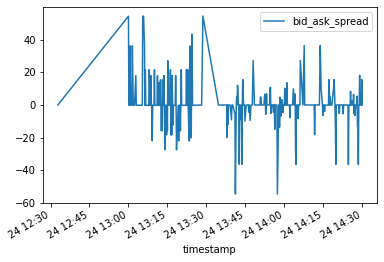

In [97]:
# Plot the resulting bid-ask spread data
df.plot()

In [98]:
# Slice the data
slice_df = df[df.bid_ask_spread < 2]
slice_df = slice_df[slice_df.bid_ask_spread > -2]
slice_df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50+00:00,0.000000
2018-12-24 13:00:10+00:00,-0.205000
2018-12-24 13:00:20+00:00,-0.186667
2018-12-24 13:00:50+00:00,-0.205000
2018-12-24 13:01:10+00:00,-0.190000


In [99]:
# Resample to 10 Seconds ('10S'), take the mean, and drop the NaN values
slice_df=slice_df.resample('10S').mean()
slice_df.dropna(inplace=True)
slice_df.head()

,bid_ask_spread
timestamp,
2018-12-24 12:32:50+00:00,0.000000
2018-12-24 13:00:10+00:00,-0.205000
2018-12-24 13:00:20+00:00,-0.186667
2018-12-24 13:00:50+00:00,-0.205000
2018-12-24 13:01:10+00:00,-0.190000


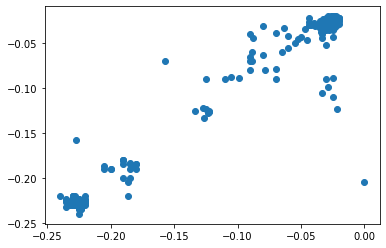

In [100]:
# Scatter plot of lagged bid ask spred vs bid ask spred
slice_df['lag_bid_ask_spread'] = slice_df.bid_ask_spread.shift()
slice_df['bid_ask_spread_diff'] = slice_df.bid_ask_spread.diff()
x = slice_df['lag_bid_ask_spread']
y = slice_df['bid_ask_spread']
plt.scatter(x, y)

In [101]:
# Calculate the autocorrelation
slice_df.bid_ask_spread.autocorr(lag=1)

0.9714256946234167

In [102]:
# Calculate the autocorrelation
slice_df.bid_ask_spread.autocorr(lag=2)

0.9555781047676242

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

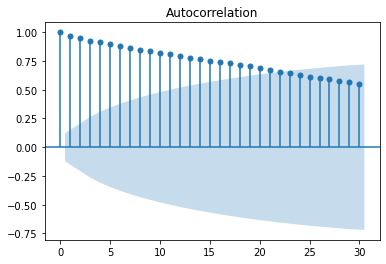

In [104]:
# Plot the ACF
acf = plot_acf(slice_df.bid_ask_spread, lags=30)

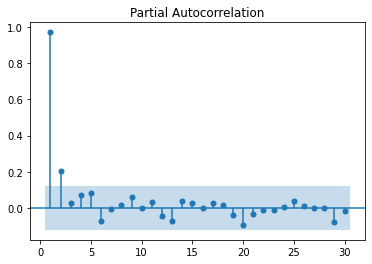

In [105]:
# Plot the PACF
pacf = sm.graphics.tsaplots.plot_pacf(slice_df.bid_ask_spread, lags=30, zero=False)

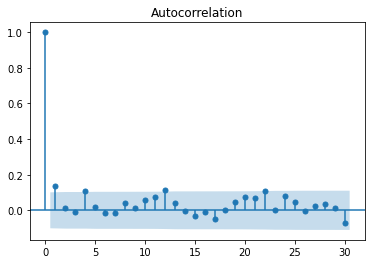

In [106]:
# Plot the ACF
acf = plot_acf(df.bid_ask_spread, lags=30)

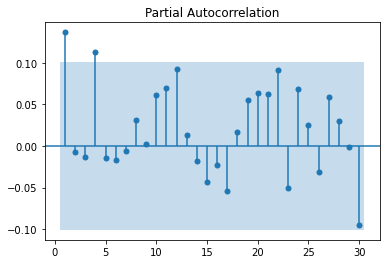

In [107]:
# Plot the PACF
pacf = sm.graphics.tsaplots.plot_pacf(df.bid_ask_spread, lags=30, zero=False)